Hand-In Assignment 1 Submission
Assignment task: Use regression models to predict bus arrival delays.

**Load and prepare the data**

In [1]:
#code from tutorial
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [2]:
#code from tutorial
#use 1000 records, the first 1000
df = df.iloc[:1000]
#use 1000 random samples
df = df.sample(1000)

removing the data that is not nummbers

In [3]:
#code from tutorial
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

In [4]:
#code from tutorial
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993908
Dwell_time,0.222777
Recurrent_delay,0.161830
Scheduled_travel_time,0.117362


In [5]:
#code from tutorial

#Y is the one that we want to predict
#x is the variaables that explains what Y will be
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

#sns.pairplot(x)

**Train test split**<br>
splitting the data into training set and test set is important. We train the model with the traing data and then use the test data to test if the model preictions align with the test data. This prevents overfitting, becuse if the model is not still good when adding the test data its overfitted to the training data.

In [6]:
#code from tutorial

#split the traingin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Create a linear regression model with xgboost**

Xgboost improvs models performance by combinig many descision trees.

In [7]:
#import xgboost and use xgboost to crea linear regression model
#https://machinelearningmastery.com/xgboost-for-regression/ xgboost documentation
import xgboost as xgb
from xgboost import XGBRegressor

# Creation of XGBoost Regression model
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)


**Evaluate model**

In [8]:
#Using Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared (R2) to evaluate model.

#code from tutorial
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 12.182528982162475
Mean Squared Error: 313.1015038930177
R-squared: 0.9864081025320842


The linear regression model in the tutotrial that did not use xg boost gave these metrics when evaluted:<br>
Mean Absolute Error: 9.317455886234555<br>
Mean Squared Error: 214.23167117392123<br>
R-squared: 0.9940113647235588<br><br>

when evaluating the regression model with XG boost and without XG boost you can notice that the **moedl without xg boost** actually is better preforming.<br> The lower MAE value shows that the predictions on average are closer to the actual values.<br> The lower MSE shows that the model has fewer large errors.<br> The R2 value is somewhat higher, wich shows that the model fits the data a tad bit more, it shows that dependent variables variance is described by the model. How ever the difference in R2 is very small, so they are basically the same. Sometimes to high R2 can indicate overfitting, this might be a problem.<br><br>

However, after doing some AI model training, the comparsion between using XG boost and not using XG boost might be different, lets find out and see.




**Visualize result**
(comparing actual results with predicted results)

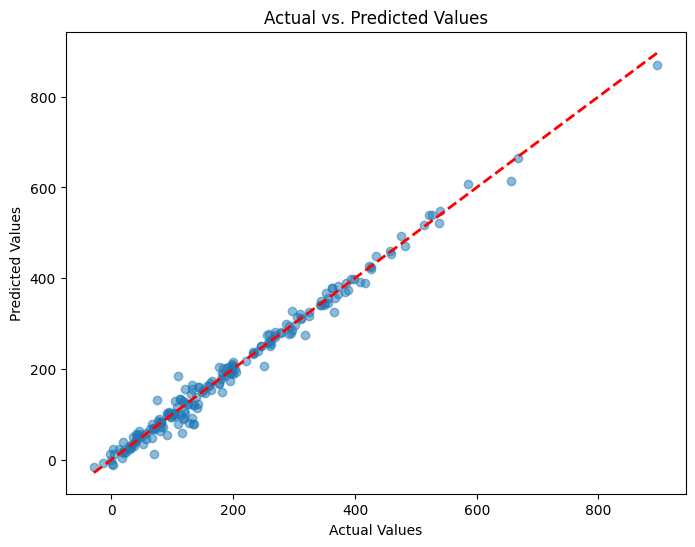

In [9]:
#code from tutorial
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Visualy the results seems quiet good, the predicitons are in a straight line, if the predictions would have a lot of turns and twists it could potentially indicate overfitting. however there are some larger errors.


##AI model trainin
Now it is time to train the model with AI model training techniques (Support Vector Machine), this is done to find the best hyperparameters for the model.

**Normalization**<br>
I do this to make sure that all the feutures i.e input variabels are on the same scale. This is important so that for instance one variable do not affect the model disproporitonally.

In [10]:
#code from tutorial

from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Grid search**<br>
this is done to find the best hyperparemters for the svm. It does this true testing diferernt combinations of the parameters to see wich works the best. It is benificial that the normalization is done before the grid search becuse otherwise some variable might have a unproportional effect on the model.

In [11]:
#code from tutorial

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.0

förklara

Create a SVM regression model using the best parameters that where generated thru the AI training and train the model using the training data.

In [12]:
#code from tutorial

# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

Creat prediction with model and evaluate with the same metrics as earlier

In [13]:
#code from tutorial

y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.788621059537837
Mean Squared Error: 207.70752592360594
R-squared: 0.990983309372309


Results from tutorial after AI training but without XGboost <br> Mean Absolute Error: 9.465517729822414 <br>
Mean Squared Error: 224.3553394017559 <br>
R-squared: 0.9937283675535139<br>

When evaluating the AI trained regression model with XG boost and without XG boost you can notice that the model with XG boost has a lower MSE, this means that the XG boosted model has fewer large errors. <br>
Both had similare MAE and R2. However the model without XG boost´s MAE and R2 are actually indicating that it is a slightly better prefroming model than the one with xg boost.

**However** when comparing the AI trained xg boosted regression model with the not AI trained xg boosted regression model there are great differences. The MAE and MSE are a lot lower this shows that the AI trained model predictions on average are closer to the actual values and that the model has fewer large errors. The R2 value is higher wich shows that dependent variables variance is explained even better by the AI trained model.


Visualize result again (comparing actual results with predicted results)

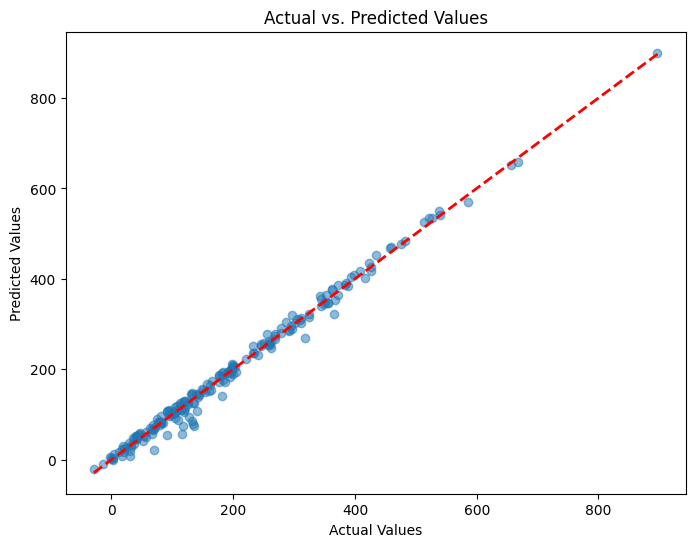

In [14]:
#code from tutorial

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Visually it seems that the model is better after AI training, there are fewer larg errors that can be visually spooted. Also the prediciton model does not visually seem to be overfitted since it goes in a straight line and does not curve a lot to include all the traingi data points.